In [1]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##load data
data=pd.read_csv('/home/srija/Downloads/Compressed/Datasets/House_Price.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data=data.drop(['No','X1 transaction date'],axis=1)
data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
##Renaming the column names according to convinience
data.columns=['House_age','Distance frm MRT Station','No of stores','Latitude','Longitude','House_Price']
data.head()

,House_age,Distance frm MRT Station,No of stores,Latitude,Longitude,House_Price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data.isnull().sum()

House_age                   0
Distance frm MRT Station    0
No of stores                0
Latitude                    0
Longitude                   0
House_Price                 0
dtype: int64

In [6]:
##compute the pair wise correlation for all columns  
correlation_matrix=data.corr()
correlation_matrix

,House_age,Distance frm MRT Station,No of stores,Latitude,Longitude,House_Price
House_age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance frm MRT Station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
No of stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
House_Price,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [7]:
##fitting the data into x and y variables
x=data.iloc[:,0:5].values
y=data.iloc[:,5].values

In [8]:
from sklearn.preprocessing import StandardScaler 
# Initialise the Scaler
scaler = StandardScaler() 
# To scale data 
x = pd.DataFrame(scaler.fit_transform(x))
x.columns=['House_age','Distance frm MRT Station','No of stores','Latitude','Longitude']

In [9]:
## Splitting the data into training and testing samples
## splits the training and test data set in 80% : 20%
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [10]:
## Building the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
## Training the Model
model.fit(xtrain,ytrain)

LinearRegression()

In [11]:
##y=theta(0)+theta(1)*x1+theta(2)*x2+theta(3)*x3+theta(4)*x4+theta(5)*x5
##coeff's and intercept of the model
print("Coeff's: ",model.coef_)
print("Intercept: ",model.intercept_)

Coeff's:  [-3.0790039  -5.7388054   3.25126781  2.92641771 -0.36641104]
Intercept:  38.05114387129795


In [12]:
## Prediction
y_pred = model.predict(xtest)
print("Predicted values of testing data:\n",y_pred)

Predicted values of testing data:
 [47.74180481 41.95484652 44.5399885  41.33697932 30.28548    42.84474934
 45.98717123 45.90599326 24.78369465 52.02068924 32.23880597 34.77542016
 39.51392044 24.90203898 35.73984968 32.99552705 41.96863217 46.98662328
 31.50100311 44.49258341  2.21362693 33.64381059 47.764103   43.56374399
 14.07301949 41.29883092 14.73315281 44.5399885  36.13972668 37.76019401
 11.66211419 39.22848089 37.83881729 28.61334713 45.93500741 31.52925298
 52.2101045  15.18188713 46.84531477 40.47464938 36.01694465 40.58052131
 48.38869976 39.8943259  42.00896517 48.22742934 45.07252677 23.5290158
 49.9849698  48.13933326 47.74180481 48.54209921 40.94754085 42.54642454
 36.38766353 15.15482781 35.13348041 36.39866246 30.20430203 45.90599326
 33.69672647 32.65567761 15.15482781 11.8739673   8.74877596 33.67086991
 29.81801432 45.24751413 34.2425491  30.54861606 46.09153043 35.88168944
 46.95956396 45.3951109  35.70165143 39.53744483 38.45558781 40.03447874
 42.7135767  31.9

In [13]:
##model evaluation for testing set
##mean_square_error => sigma((ytest-ypred)^2))/2*m
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(ytest,y_pred)
print("mean_square_error:",MSE)
rmse = (np.sqrt(mean_squared_error(ytest, y_pred)))
print("RMSE is:",rmse)

mean_square_error: 54.58094520086243
RMSE is: 7.38789179677548


In [14]:
##acurracy score for training and testing data
test_score=model.score(xtest,ytest)
train_score=model.score(xtrain,ytrain)
print("Linear Regression testing score:",test_score)

Linear Regression testing score: 0.6746481382828158


In [15]:
##Regularizing the model using Rigid Regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=100)
rr.fit(xtrain, ytrain)
##acurracy score for training and testing data
Ridge_train_score = rr.score(xtrain,ytrain)
Ridge_test_score = rr.score(xtest, ytest)
rr100=Ridge(alpha=500)
rr100.fit(xtrain, ytrain)
Ridge_train_score100 = rr100.score(xtrain,ytrain)
Ridge_test_score100 = rr100.score(xtest, ytest)

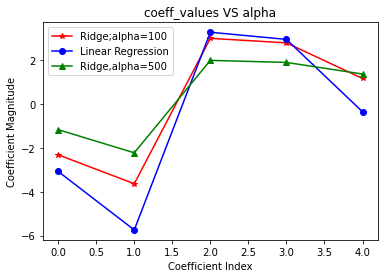

In [16]:
plt.plot(rr.coef_,marker='*',color='red',label=r'Ridge;alpha=100') 
plt.plot(model.coef_,marker='o',color='blue',label='Linear Regression')
plt.plot(rr100.coef_,marker='^',color='green',label=r'Ridge,alpha=500') 
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.title("coeff_values VS alpha")
plt.legend()
plt.show()

In [17]:
##Prediction
def House_Price_predict():
    X1 = float(input("House age : "))
    X2 = float(input("Distance to nearest MRT station : "))
    X3 = int(input("No of stores : "))
    X4 = float(input("Latitude : "))
    X5 = float(input("Longitude : "))
    X=scaler.fit_transform([[X1,X2,X3,X4,X5]])
    price = rr.predict(X)
    return "House Price : " + str(price)

In [18]:
House_Price_predict()

House age : 32
Distance to nearest MRT station : 84.87
No of stores : 10
Latitude : 24
Longitude : 121


'House Price : [38.07662994]'